# **Cardiovascular Disease Prediction**

Imports the library

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import  GradientBoostingClassifier


## **Loading data from the file**

Dataset is downloaded from here:https://www.kaggle.com/datasets/akshatshaw7/cardiovascular-disease-dataset/data

In [19]:
data = pd.read_excel('health_data.xlsx')

In [20]:
data.shape

(70000, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


### **Feature Engineering**

Changing the atrribute type and add new feature(integer) for BMI(Body mass index)

In [22]:
data['weight'] = data['weight'].astype(int)
data['BMI'] = data['weight']/((data['height']/100)**2)
data['BMI'] = data['BMI'].astype(int)
data['Age'] = data['age']/365
data['Age'] = data['Age'].astype(int)
data.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Age
0,0,0,18393,1,168,62,110,80,0,0,0,0,1,0,21,50
1,1,1,20228,0,156,85,140,90,2,0,0,0,1,1,34,55
2,2,2,18857,0,165,64,130,70,2,0,0,0,0,1,23,51
3,3,3,17623,1,169,82,150,100,0,0,0,0,1,1,28,48
4,4,4,17474,0,156,56,100,60,0,0,0,0,0,0,23,47


Changing the atrribute name

In [23]:
data['syst_bp'] = data['ap_hi'].astype(int)
data['diast_bp'] = data['ap_lo'].astype(int)

Drop features that are not required to build our model

In [24]:
data.drop(['Unnamed: 0','id', 'age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco','active','height','weight', 'ap_hi','ap_lo' ], axis=1, inplace=True)

In [25]:
data

,cardio,BMI,Age,syst_bp,diast_bp
0,0,21,50,110,80
1,1,34,55,140,90
2,1,23,51,130,70
3,1,28,48,150,100
4,0,23,47,100,60
...,...,...,...,...,...
69995,0,26,52,120,80
69996,1,50,61,140,90
69997,1,31,52,180,90
69998,1,27,61,135,80


In [26]:
data.describe()

,cardio,BMI,Age,syst_bp,diast_bp
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499700,27.064286,52.840671,128.817286,96.630414
std,0.500003,6.100707,6.766774,154.011419,188.472530
min,0.000000,3.000000,29.000000,-150.000000,-70.000000
25%,0.000000,23.000000,48.000000,120.000000,80.000000
50%,0.000000,26.000000,53.000000,120.000000,80.000000
75%,1.000000,30.000000,58.000000,140.000000,90.000000
max,1.000000,298.000000,64.000000,16020.000000,11000.000000


In [27]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

## **Data Cleaning**

Drop the duplication data

In [28]:
print("{} rows are same".format(data.duplicated().sum()))

48442 rows are same


In [29]:
data.drop_duplicates(inplace= True)

In [30]:
data.head(50)

,cardio,BMI,Age,syst_bp,diast_bp
0,0,21,50,110,80
1,1,34,55,140,90
2,1,23,51,130,70
3,1,28,48,150,100
4,0,23,47,100,60
5,0,29,60,120,80
6,0,37,60,130,80
7,1,29,61,130,90
8,0,28,48,110,70
9,0,25,54,110,60


In [31]:
print("{} rows are same".format(data.duplicated().sum()))

0 rows are same


In [32]:
data.shape

(21558, 5)

Handle NA values

In [33]:
data.isnull().sum()

cardio      0
BMI         0
Age         0
syst_bp     0
diast_bp    0
dtype: int64

In [34]:
print(f"Missing values are present: {data.isnull().sum().any()}") # no missing values

Missing values are present: False


 ## ***Co-relation among the Atributes***

In [35]:
data.corr()

,cardio,BMI,Age,syst_bp,diast_bp
cardio,1.000000,0.099791,0.118966,0.039397,0.072537
BMI,0.099791,1.000000,0.046577,0.006917,0.007018
Age,0.118966,0.046577,1.000000,0.010624,0.020118
syst_bp,0.039397,0.006917,0.010624,1.000000,0.008846
diast_bp,0.072537,0.007018,0.020118,0.008846,1.000000


In [36]:
df_c0 = data[data['cardio'] == 0]
lst = ['syst_bp', 'diast_bp', 'BMI','Age']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lst:
    Q1 = df_c0[e].quantile(0.25)
    Q3 = df_c0[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,syst_bp,diast_bp,BMI,Age
Q minimo,80.0,40.0,9.5,28.0
Q maximo,160.0,120.0,45.5,76.0


### **Removing the Outliers**

In [37]:
outlier_c0 = df_c0[(df_c0['diast_bp']>90)|(df_c0['diast_bp']<60)|(df_c0['syst_bp']>130)|(df_c0['syst_bp']<100)|(df_c0['Age']>64)|(df_c0['Age']<39)| (df_c0['BMI']>24.9)|(df_c0['BMI']<18.5)].index
df_c0.drop(outlier_c0, inplace=True)

<ipython-input-37-99fa54981f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c0.drop(outlier_c0, inplace=True)


In [38]:
df_c0.describe()

,cardio,BMI,Age,syst_bp,diast_bp
count,2059.0,2059.000000,2059.000000,2059.000000,2059.000000
mean,0.0,21.890724,51.016513,115.196697,75.021370
std,0.0,1.623804,7.209466,10.015764,9.367589
min,0.0,19.000000,39.000000,100.000000,60.000000
25%,0.0,21.000000,45.000000,110.000000,70.000000
50%,0.0,22.000000,51.000000,120.000000,78.000000
75%,0.0,23.000000,57.000000,120.000000,80.000000
max,0.0,24.000000,64.000000,130.000000,90.000000


In [39]:
df_c1 = data[data['cardio'] == 1]
lst = ['syst_bp', 'diast_bp', 'BMI','Age']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lst:
    Q1 = df_c1[e].quantile(0.25)
    Q3 = df_c1[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,syst_bp,diast_bp,BMI,Age
Q minimo,75.0,50.0,9.0,34.0
Q maximo,195.0,130.0,49.0,74.0


In [40]:
outlier_c1 = df_c1[(df_c1['diast_bp']>105)|(df_c1['diast_bp']<70)|(df_c1['syst_bp']>170)|(df_c1['syst_bp']<90)|(df_c0['Age']>64)|(df_c0['Age']<39)|(df_c1['BMI']>40)|(df_c1['BMI']<16)].index
df_c1.drop(outlier_c1, inplace=True)
df_c1.describe()

<ipython-input-40-cbda70431da0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_c1 = df_c1[(df_c1['diast_bp']>105)|(df_c1['diast_bp']<70)|(df_c1['syst_bp']>170)|(df_c1['syst_bp']<90)|(df_c0['Age']>64)|(df_c0['Age']<39)|(df_c1['BMI']>40)|(df_c1['BMI']<16)].index
<ipython-input-40-cbda70431da0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1.drop(outlier_c1, inplace=True)


,cardio,BMI,Age,syst_bp,diast_bp
count,8854.0,8854.000000,8854.000000,8854.000000,8854.000000
mean,1.0,28.406144,53.294217,136.240456,85.095776
std,0.0,5.564929,6.974422,17.693396,9.644387
min,1.0,16.000000,39.000000,90.000000,70.000000
25%,1.0,24.000000,48.000000,120.000000,80.000000
50%,1.0,28.000000,54.000000,140.000000,85.000000
75%,1.0,33.000000,59.000000,150.000000,90.000000
max,1.0,40.000000,64.000000,170.000000,105.000000


### **Ploting the Graph among the Cardio vs other parameters**




This will check that which parameter is most affecting to the Output Variable which is dependent variable.

<Axes: xlabel='colunas', ylabel='valores'>

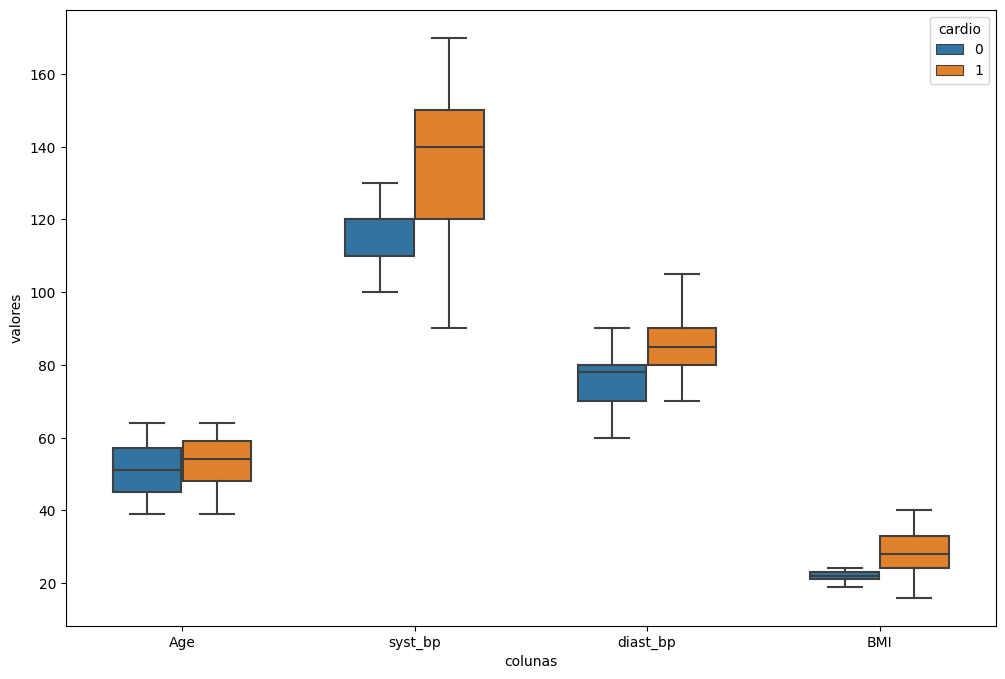

In [41]:
data = pd.concat([df_c0, df_c1])
df = pd.melt(data,id_vars='cardio', value_vars=['Age', 'syst_bp', 'diast_bp', 'BMI'], var_name='colunas', value_name='valores', col_level=None)
plt.figure(figsize=(12,8))
sb.boxplot(x='colunas', y='valores',whis=1.5, width = .6, hue='cardio', data=df)

In [42]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,cardio,BMI,Age,syst_bp,diast_bp
count,10913.00,10913.00,10913.00,10913.00,10913.00
mean,0.81,27.18,52.86,132.27,83.19
std,0.39,5.67,7.08,18.46,10.37
min,0.00,16.00,39.00,90.00,60.00
25%,1.00,23.00,47.00,120.00,79.00
50%,1.00,26.00,53.00,130.00,80.00
75%,1.00,31.00,59.00,150.00,90.00
max,1.00,40.00,64.00,170.00,105.00


In [43]:
data.cardio.value_counts()

1    8854
0    2059
Name: cardio, dtype: int64

0 = No Cardio 1 = Cardio


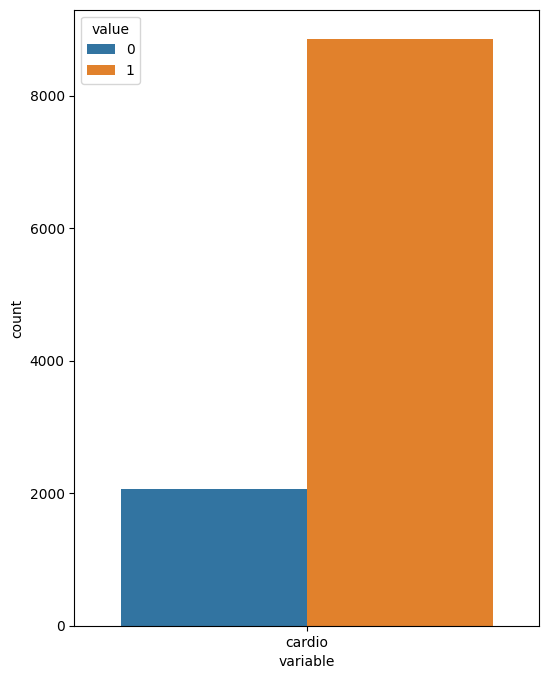

In [44]:
plt.figure(figsize=(6,8))
dataframe_categorical = data.loc[:,['cardio']]
sb.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

print ("0 = No Cardio", "1 = Cardio" )

In [45]:
data.shape

(10913, 5)

0 = No Cardio 1 = Cardio


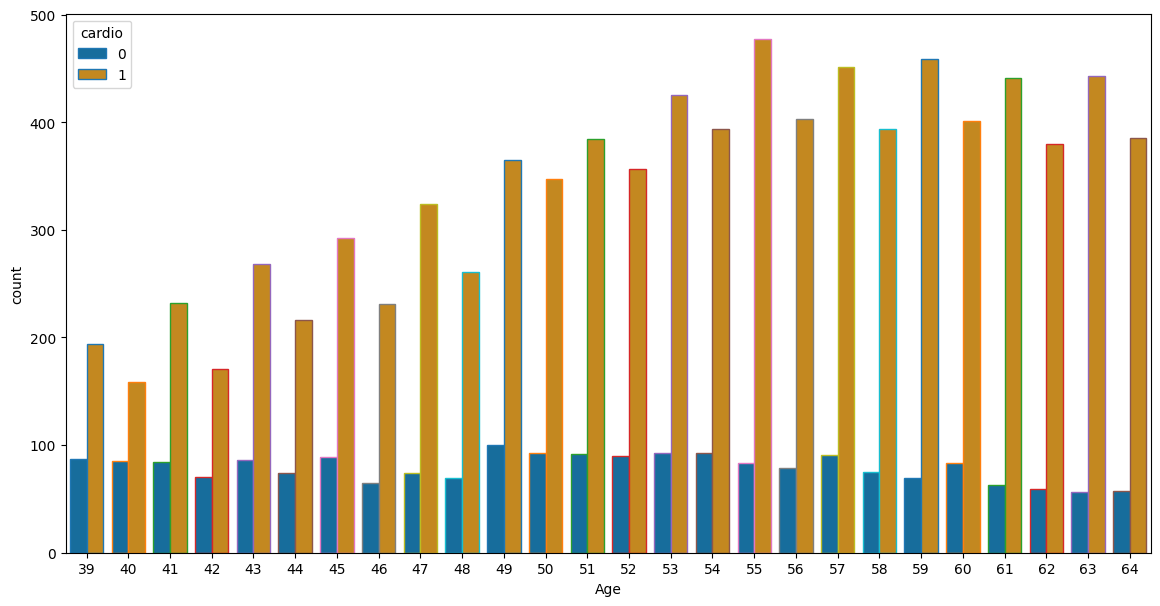

In [46]:
plt.figure(figsize = (14,7))
sb.countplot(x='Age', hue = 'cardio', data = data, palette = 'colorblind', edgecolor = sb.color_palette(as_cmap='RdGy_r', n_colors=5));
print ("0 = No Cardio", "1 = Cardio" )

### **Ploting the graph of age and cardio**

We can analyse that how due to age the chance of cardio in human increase or decrease

In [47]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [48]:
continous_val

['BMI', 'Age', 'syst_bp', 'diast_bp']

### **Ploting the Parameter VS Cardio 0 and 1 visualization**

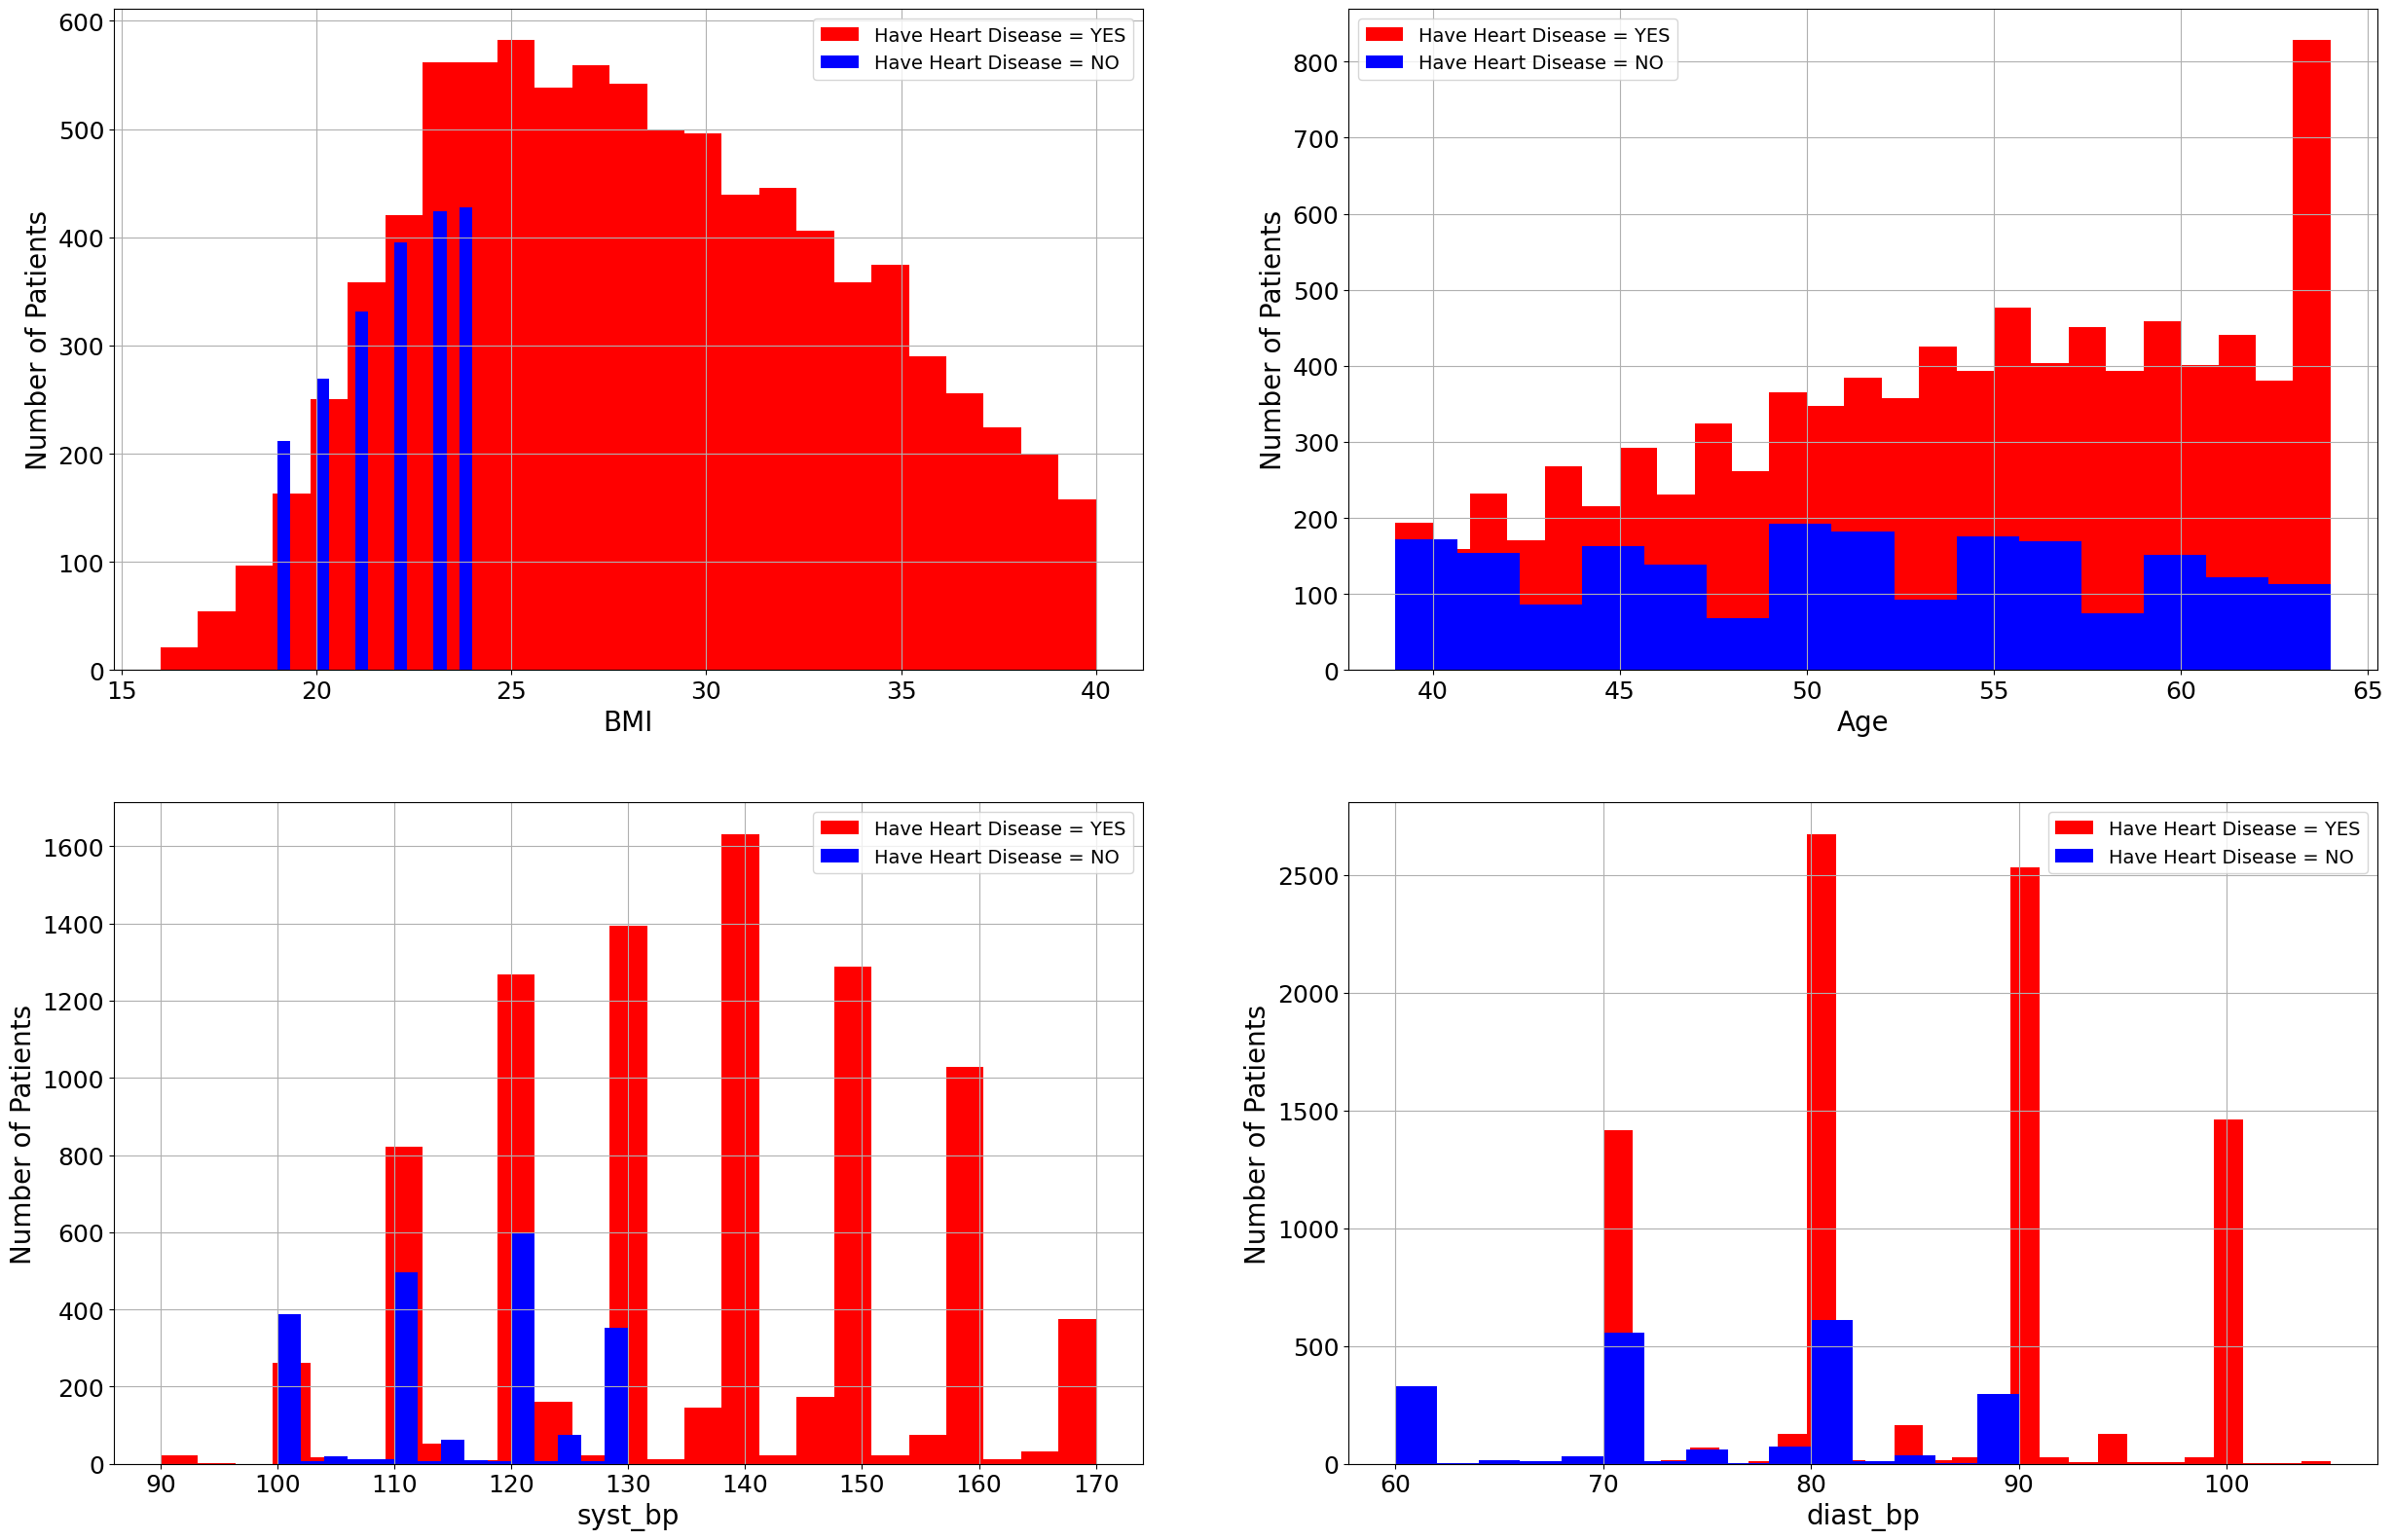

In [49]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(continous_val,1):
    plt.subplot(3, 2, i)
    data[data["cardio"] == 1][column].hist(bins=25, color='Red', label='Have Heart Disease = YES', alpha=1)
    data[data["cardio"] == 0][column].hist(bins=15, color='Blue', label='Have Heart Disease = NO', alpha=1)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Number of Patients" ,fontsize=20)

In [50]:
data.corr()

,cardio,BMI,Age,syst_bp,diast_bp
cardio,1.00,0.45,0.13,0.45,0.38
BMI,0.45,1.00,0.08,0.29,0.26
Age,0.13,0.08,1.00,0.11,0.05
syst_bp,0.45,0.29,0.11,1.00,0.60
diast_bp,0.38,0.26,0.05,0.60,1.00


### **Visualizing the heatmap**

<ipython-input-51-5213aecf0f36>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype = np.bool)


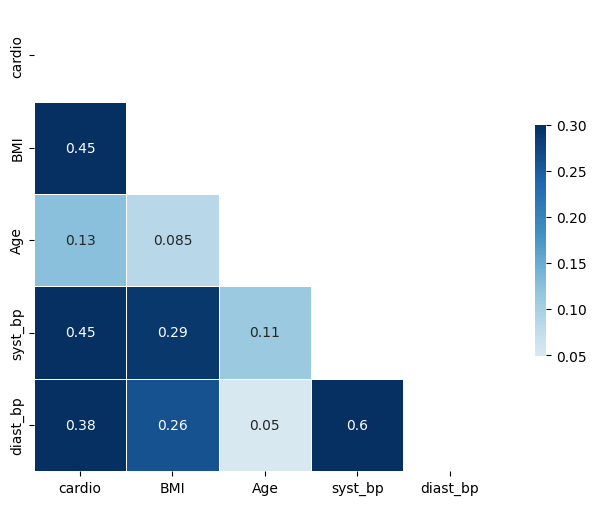

In [51]:
# Multivariate Analysis & Correlation Detection
import seaborn as sb
correl = data.corr()
cmap = sb.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (10,6))

sb.heatmap(correl, mask = mask, cmap ='RdBu', vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

In [52]:
categorical_val.remove('cardio')
dataset = pd.get_dummies(data, columns = categorical_val)

In [53]:
dataset

,cardio,BMI,Age,syst_bp,diast_bp
0,0,21,50,110,80
4,0,23,47,100,60
11,0,20,51,120,80
12,0,22,40,120,80
17,0,20,45,110,70
...,...,...,...,...,...
69933,1,26,55,110,80
69934,1,34,43,120,90
69947,1,38,63,110,80
69949,1,24,60,167,85


### **Catorization of the Bloodpressure**

In [54]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=140 or y<=90:
        return "high 2"
    else:
        return None

data.insert(1,"bp_cat", data.apply(lambda row: BPCategorize(row['syst_bp'], row['diast_bp']), axis=1))
data['bp_cat'].value_counts()

high 1      4125
normal      3442
high 2      2016
elevated     203
Name: bp_cat, dtype: int64

### **Checking the Probability of the given features**

1.   Age
2.   BMI
3.   Blood pressure



If the probability is very less than we can say that it will not affecting and we can drop that atribute and do efficient feature scaling.

In [55]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=45')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

82.88

In [56]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=50')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

83.93

In [57]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=55')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

85.55

In [58]:
# Probability that a person has cardio diseases given that he is 50 or older

data_age_50 = data.query('Age >=64')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

87.1

In [59]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=23')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

89.79

In [60]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=24')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

94.18

In [61]:
# Probability that a person has cardio diseases given that he has body mass index greater than 37

data_BMI23 = data.query('BMI>=25')
data_BMI23_cardio = data_BMI23.query('cardio ==1')
round(data_BMI23_cardio.shape[0]*100/data_BMI23.shape[0],2)

100.0

In [62]:
# Probability that a person has cardio diseases given that the patient has a hypertensive crisis

data_high1 = data.query("bp_cat == 'high 1'")
data_high_cardio = data_high1.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high1.shape[0],2)

85.96

In [63]:
# Probability that a person has cardio diseases given that the patient has a hypertensive crisis

data_high2 = data.query("bp_cat == 'high 2'")
data_high_cardio = data_high2.query('cardio == 1')
round(data_high_cardio.shape[0]*100/data_high2.shape[0],2)

100.0

In [64]:
print(data.columns)
print(dataset.columns)

Index(['cardio', 'bp_cat', 'BMI', 'Age', 'syst_bp', 'diast_bp'], dtype='object')
Index(['cardio', 'BMI', 'Age', 'syst_bp', 'diast_bp'], dtype='object')


### **Boxploting to compare Age and BMI for Cardio and Non cardio**

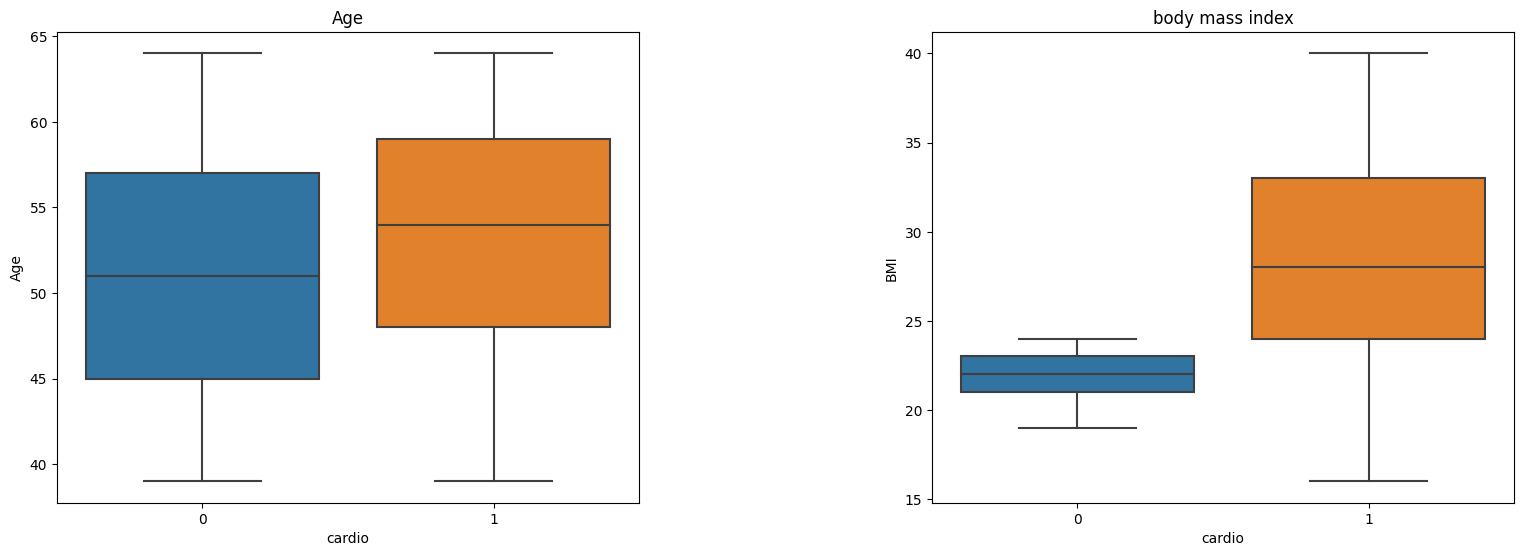

In [65]:
# we're making boxplots to compare the age and body mass index for the cardio and non-cardio patients.
# Visulization
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=data, x='cardio', y='Age', ax=ax[0])
sb.boxplot(data=data, x='cardio', y='BMI', showfliers=False, ax=ax[1])
ax[0].title.set_text('Age')
# ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
# ax[1].set_xticklabels(['No-cardio', 'Cardio'])
# ax[0].set_xlabel("")
# ax[1].set_xlabel("")

In [66]:
print(dataset)

       cardio  BMI  Age  syst_bp  diast_bp
0           0   21   50      110        80
4           0   23   47      100        60
11          0   20   51      120        80
12          0   22   40      120        80
17          0   20   45      110        70
...       ...  ...  ...      ...       ...
69933       1   26   55      110        80
69934       1   34   43      120        90
69947       1   38   63      110        80
69949       1   24   60      167        85
69992       1   21   51      170        90

[10913 rows x 5 columns]


## **Data splitting**

In [67]:
from sklearn.model_selection import train_test_split

X = dataset.drop("cardio", axis = 1)

y = dataset["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle=100,)

In [68]:
print('Train set shape is',format(X_train.shape))
print('Test set shape is',format(X_test.shape))

Train set shape is (8730, 4)
Test set shape is (2183, 4)


For Generating basic Modle Report

In [69]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## **Training the Model**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.08%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.68    0.97      0.90       0.83          0.92
recall       0.89    0.90      0.90       0.90          0.90
f1-score     0.77    0.94      0.90       0.85          0.91
support   1628.00 7102.00      0.90    8730.00       8730.00
_______________________________________________
Confusion Matrix: 
 [[1455  173]
 [ 693 6409]]

Test Result:
Accuracy Score: 88.18%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.65    0.97      0.88       0.81          0.90
recall      0.88    0.88      0.88       0.88          0.88
f1-score    0.75    0.92      0.88       0.83          0.89
support   431.00 1752.00      0.88    2183.00       2183.00
_______________________________________________
Confusion Matrix: 
 [[ 379   52]
 [ 

### **Confusion matrix for Training data**

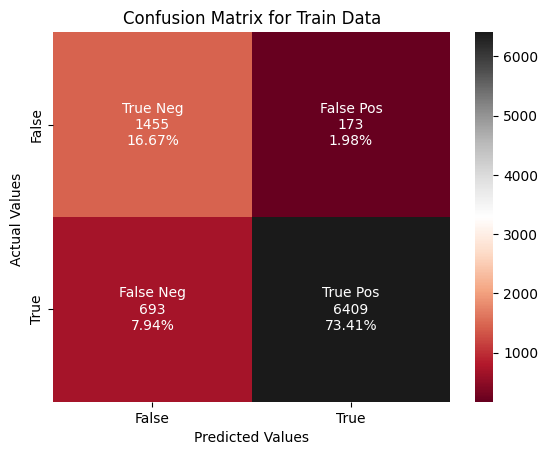

In [71]:
y_pred = gb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')
ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### **Confusion matrix for Testing data**

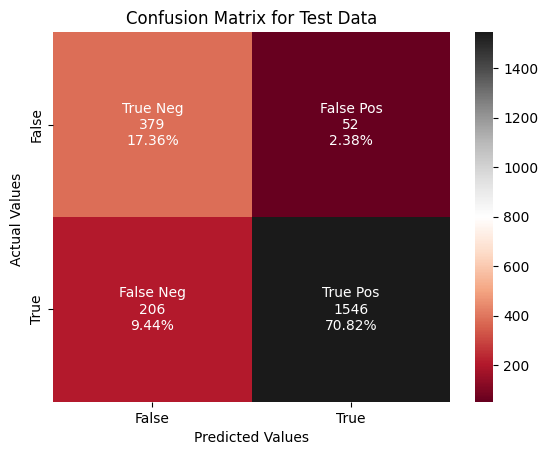

In [72]:
# confusion matrix for x test
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
X_test[:10]

,BMI,Age,syst_bp,diast_bp
49241,26,42,130,80
6249,22,43,100,70
57803,24,44,110,90
32244,30,57,140,70
2224,25,59,130,80
65584,29,44,150,90
11935,27,40,150,100
46123,19,47,140,90
46062,21,50,120,90
54042,25,49,100,80


In [74]:
y_test[:10]

49241    1
6249     0
57803    0
32244    1
2224     1
65584    1
11935    1
46123    1
46062    0
54042    1
Name: cardio, dtype: int64

In [75]:
y_pred[:10]

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

### **Roc-curve for Training data**

In [76]:
# roc curve for train
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9631051778334234

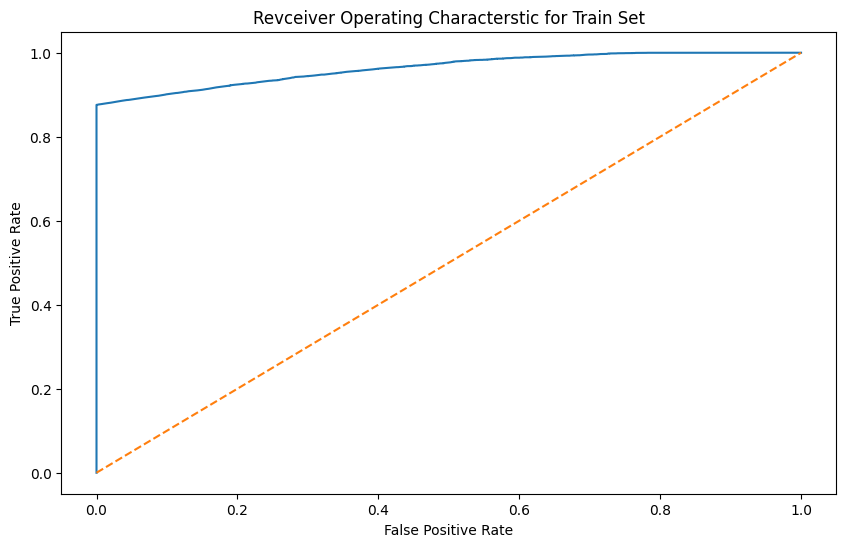

In [77]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for Train Set')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### **Roc-curve for Testing data**

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9514548835139687

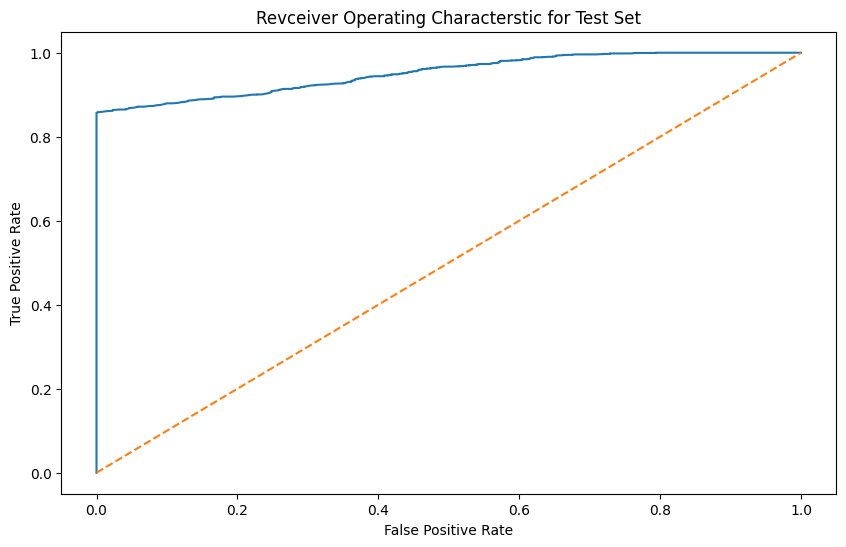

In [79]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for Test Set')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### **Checking Accuracy**

In [81]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,GradientBoostingClassifier,90.08,88.18


### **Function for Predicting and Testing the model for a few properties**

In [83]:
def predict(age, syst_bp, diast_bp, height, weight):
    bmi = int(weight / ((height / 100) ** 2))

    # Create a 2D array with the correct shape
    x = np.array([bmi, age, syst_bp, diast_bp]).reshape(1, -1)  # Reshape to (1, 4)
    x = x.round(2)

    # Make prediction
    prediction = gb_clf.predict(x)[0]
    # Access prediction directly

    if prediction == 1:
        result = "Presence of cardiovascular disease"
    else:
        result = "Absence of cardiovascular disease"

    return result

In [84]:
predict(50,110,80,168,62)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'Absence of cardiovascular disease'

In [85]:
predict(55,140,90,156,85)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'Presence of cardiovascular disease'

In [86]:
predict(25,100,80,160,62)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'Absence of cardiovascular disease'

### **Export the tested model to a pickle file**

In [87]:
import pickle as pk
pk.dump(gb_clf,open('Cardiovascular_disease.pkl','wb'))